In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/My Drive/IA Avanzada/Reto/train.csv')

In [4]:
df.shape

(891, 12)

In [5]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df = df[df['Embarked'].notna()]

In [8]:
df=df.drop(['Cabin','Name','Ticket','PassengerId'],axis = 1)

In [9]:
df['Sex'].unique().tolist()

['male', 'female']

In [10]:
from sklearn import preprocessing
leSex = preprocessing.LabelEncoder()
leSex.fit(df['Sex'].unique().tolist())
leEmb = preprocessing.LabelEncoder()
leEmb.fit(df['Embarked'].unique().tolist())

LabelEncoder()

In [11]:
df['Sex'] = leSex.transform(df['Sex'])
df['Embarked'] = leEmb.transform(df['Embarked'])

In [12]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0


In [13]:
df['Age'].fillna(df['Age'].median(),inplace = True)

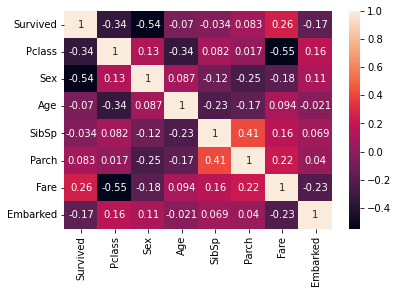

In [14]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

In [15]:
df_kmeans = df.drop(['Survived'], axis = 1)

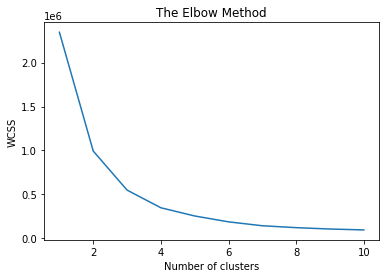

In [16]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_kmeans)
    wcss.append(kmeans.inertia_) #WCSS = within cluster sum of squares

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [17]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_kmeans)

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df['Survived'], y_kmeans)

array([[ 14, 535],
       [ 39, 301]])

## Sex, Fare, Class

In [19]:
df_1 = df_kmeans.drop(['Embarked','Parch','SibSp','Age'],axis = 1)

In [20]:
df_1.head(1)

,Pclass,Sex,Fare
0,3,1,7.25


In [21]:
kmeans3 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans3 = kmeans3.fit_predict(df_1)

In [22]:
df_3 = df_1.values

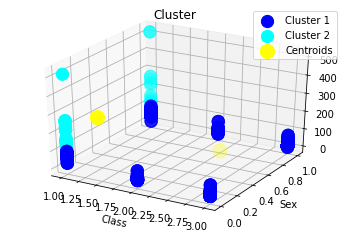

In [23]:
# Creamos la figura
fig = plt.figure()

# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')

col = ['cyan','green','blue']
#Agregamos los puntos
for i in range(0,2):
  x = df_3[y_kmeans3 == i, 0]
  y = df_3[y_kmeans3 == i, 1]
  z = df_3[y_kmeans3 == i, 2]
  clasi = 'Cluster '+str(i+1)
  ax1.scatter(x, y, z, c = col[i-1], s = 150,label = clasi)

# Agregamos los centros
x = kmeans3.cluster_centers_[:, 0]
y = kmeans3.cluster_centers_[:, 1]
z = kmeans3.cluster_centers_[:, 2]
ax1.scatter(x, y, z, c = 'yellow', s = 200, label = 'Centroids')

plt.rcParams["figure.figsize"] = (15,12)
plt.title('Cluster')
plt.legend()
plt.xlabel('Class')
plt.ylabel('Sex')

plt.show()

In [24]:
confusion_matrix(df['Survived'], y_kmeans3)

array([[535,  14],
       [301,  39]])

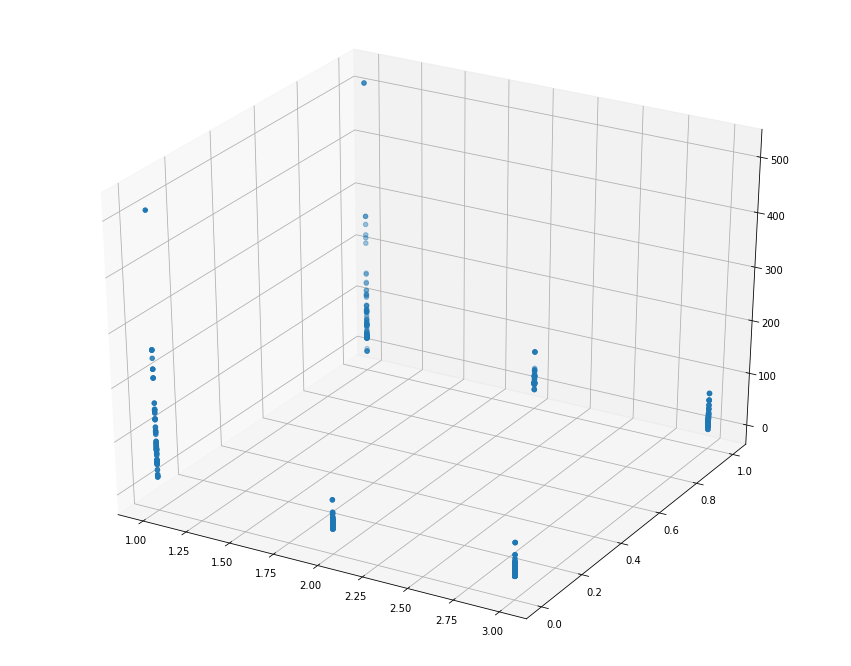

In [25]:
zdata = 15 * np.random.random(889)
ax = plt.axes(projection='3d')
ax.scatter3D(df_1['Pclass'], df_1['Sex'], df_1['Fare'], cmap='Greens')

## Age y Fare

In [26]:
df_2 = df[['Age','Fare']]

In [27]:
df_2 = df_2.values

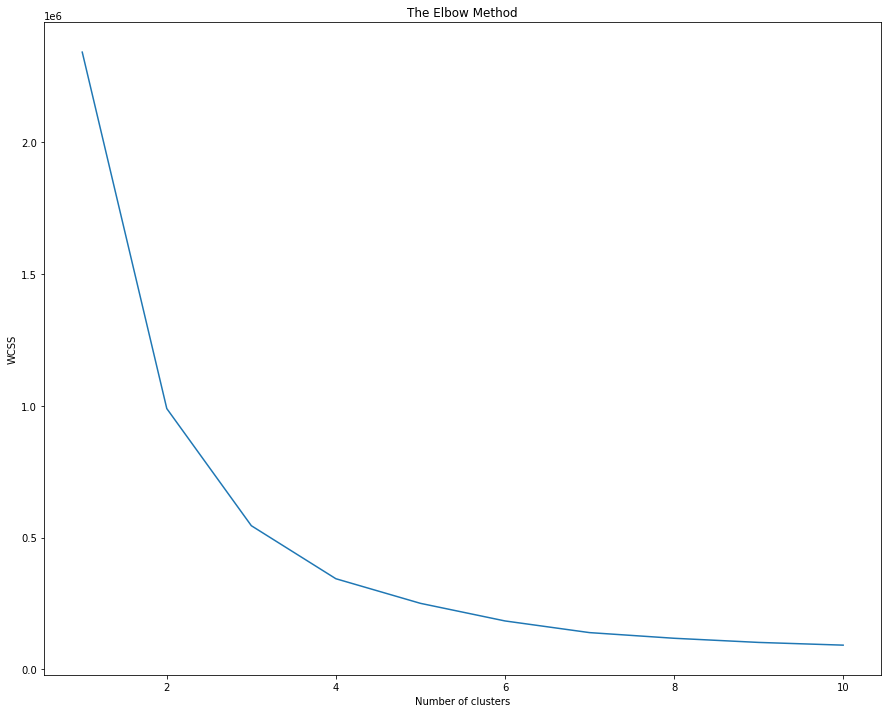

In [28]:
wcss = []
for i in range(1, 11):
    kmeans_2 = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_2.fit(df_2)
    wcss.append(kmeans_2.inertia_) #WCSS = within cluster sum of squares

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [29]:
kmeans2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans2 = kmeans2.fit_predict(df_2)

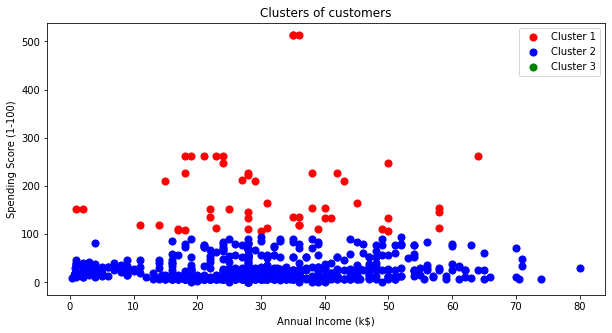

In [41]:
plt.figure(figsize=(10,5))
plt.scatter(df_2[y_kmeans2 == 0, 0], df_2[y_kmeans2 == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(df_2[y_kmeans2 == 1, 0], df_2[y_kmeans2 == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(df_2[y_kmeans2 == 2, 0], df_2[y_kmeans2 == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
#plt.scatter(df_2[y_kmeans2 == 3, 0], df_2[y_kmeans2 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [31]:
confusion_matrix(df['Survived'], y_kmeans2)

array([[ 14, 535],
       [ 39, 301]])

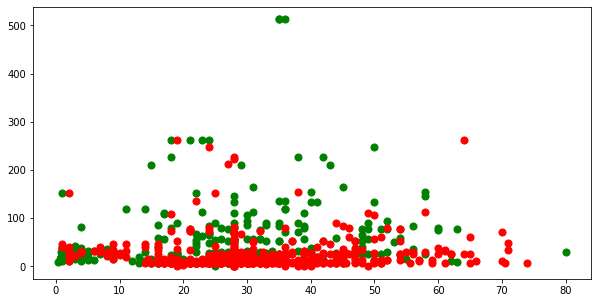

In [40]:
plt.figure(figsize=(10,5))
ax = plt.subplot()
ax.scatter(df[df['Survived'] == 1]['Age'], df[df['Survived']==1]['Fare'], c= 'green',s =50)
ax.scatter(df[df['Survived'] == 0]['Age'], df[df['Survived']==0]['Fare'], c= 'red',s =50)